<a href="https://colab.research.google.com/github/Keerthana-prasad/Keerthanana_Hackathon/blob/main/SEECybersecurity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Real-Time Intrusion Detection System**

Team Members:


1.   Adishree Kartikeyan (1RVU22BSC001)
2.   R Keerthana Prasad (1RVU23CSE363)
3.   Srivarenya Thuluva (1RVU22CSE163)
4.   Greeshma (1RVU22CSE038)
5.   Sujay Surya (1RVU23CSE481)




Problem Statement : Real-time Intrusion Detection System (IDS): Create a machine learning-based
IDS that can identify and respond to threats in real time.


Importing libraries

Data **Preprocessing**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, roc_auc_score
import scipy
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
#variable definition
columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
           'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
           'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
           'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
           'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
           'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
           'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
           'attack', 'level']

In [ ]:
# Load the datasets
train_df = pd.read_csv("KDDTrain+.txt", header=None, names=columns, low_memory=False)
test_df = pd.read_csv("KDDTest+.txt", header=None, names=columns, low_memory=False)
train_df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20.0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15.0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19.0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21.0
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21.0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62208 entries, 0 to 62207
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     62208 non-null  int64  
 1   protocol_type                62208 non-null  object 
 2   service                      62208 non-null  object 
 3   flag                         62208 non-null  object 
 4   src_bytes                    62208 non-null  int64  
 5   dst_bytes                    62208 non-null  int64  
 6   land                         62208 non-null  int64  
 7   wrong_fragment               62208 non-null  int64  
 8   urgent                       62208 non-null  int64  
 9   hot                          62208 non-null  int64  
 10  num_failed_logins            62208 non-null  int64  
 11  logged_in                    62208 non-null  int64  
 12  num_compromised              62207 non-null  float64
 13  root_shell      

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [ ]:
test_df.nunique()

,0
duration,624
protocol_type,3
service,64
flag,11
src_bytes,1149
dst_bytes,3650
land,2
wrong_fragment,3
urgent,4
hot,16


In [ ]:
test_df.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [ ]:
train_df.nunique()

,0
duration,1644
protocol_type,3
service,69
flag,11
src_bytes,2539
dst_bytes,6526
land,2
wrong_fragment,3
urgent,3
hot,24


In [ ]:
train_df.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [ ]:
# Convert appropriate columns to numeric types, handling errors
for column in train_df.columns:
    if column not in ['protocol_type', 'service', 'flag', 'attack', 'binary_attack']:
        train_df[column] = pd.to_numeric(train_df[column], errors='coerce')
        test_df[column] = pd.to_numeric(test_df[column], errors='coerce')

# Handle non-numeric values
train_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)

**Model Training:**

Checking for outliers


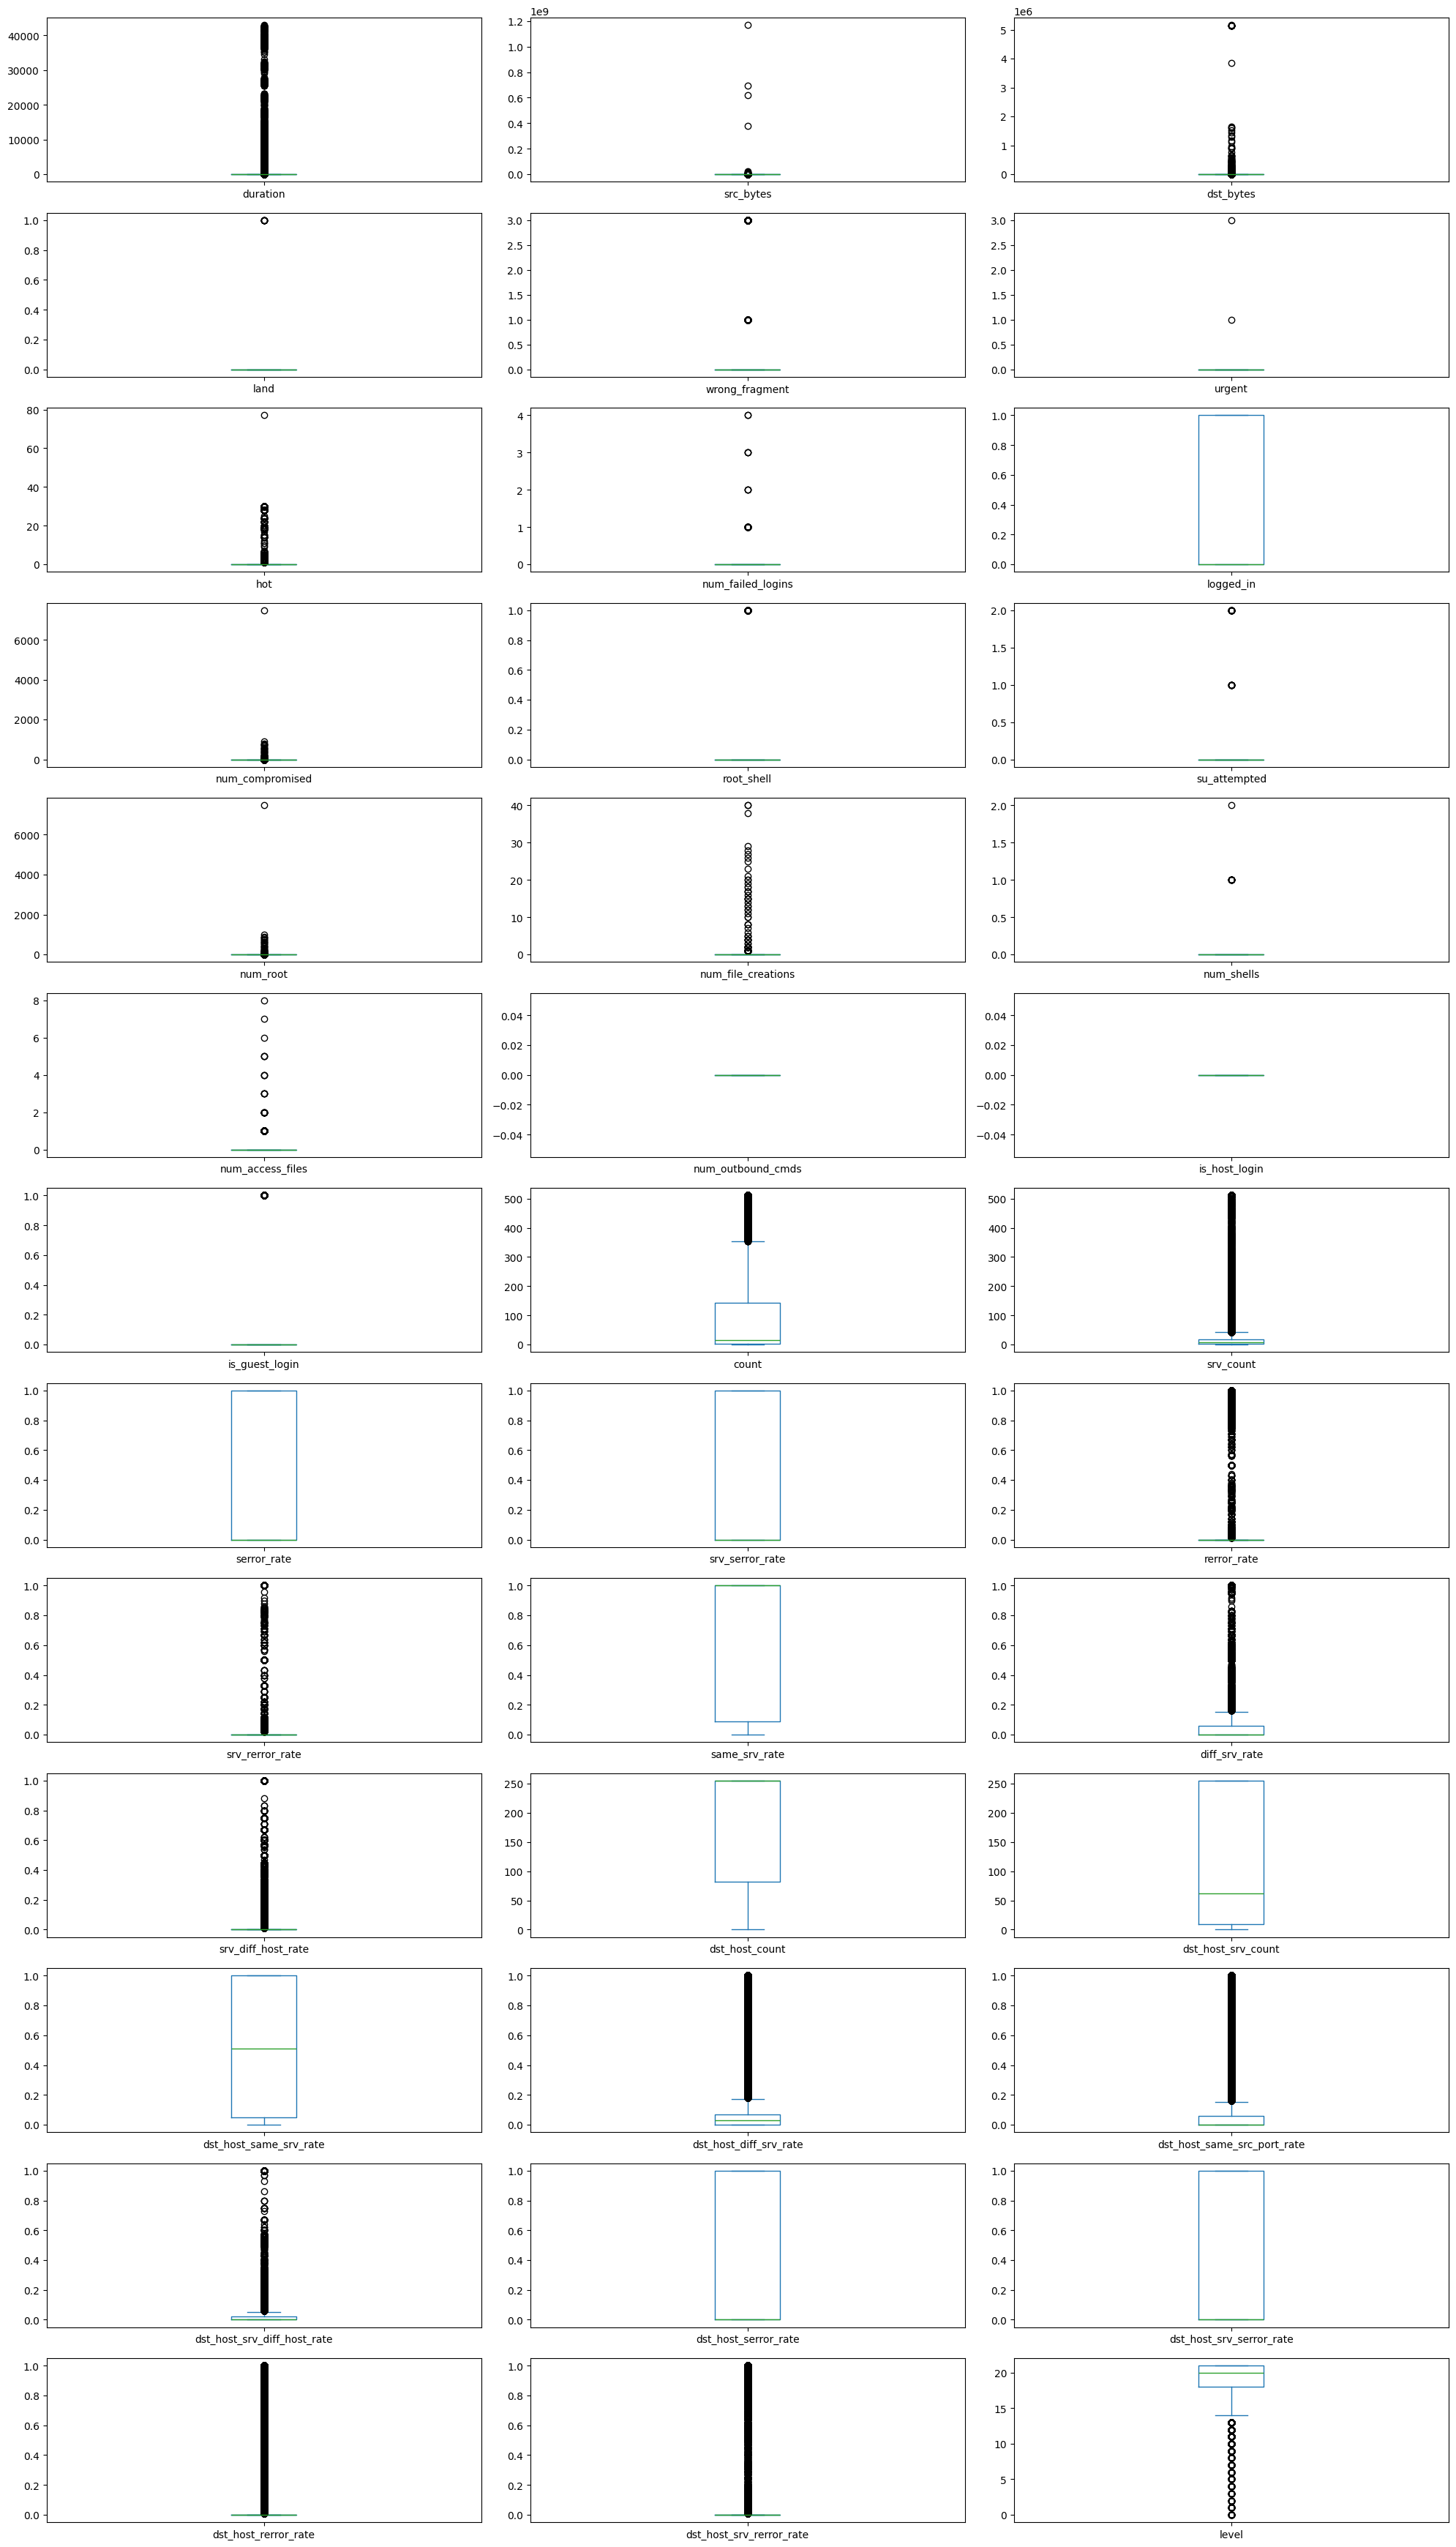

In [ ]:
import matplotlib.pyplot as plt

# Plot box plots for all numerical features in the train dataset
train_df.plot(kind='box', subplots=True, layout=(15, 3), figsize=(20, 40))
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()


In [ ]:
train_df['attack'].value_counts()

,count
attack,
normal,33053
neptune,20487
satan,1801
ipsweep,1790
portsweep,1474
smurf,1306
nmap,733
back,494
warezclient,461


In [ ]:
# Convert 'attack' to binary classification
train_df['binary_attack'] = train_df.attack.map(lambda a: "normal" if a == 'normal' else "abnormal")
train_df.drop('attack', axis=1, inplace=True)

test_df['binary_attack'] = test_df.attack.map(lambda a: "normal" if a == 'normal' else "abnormal")
test_df.drop('attack', axis=1, inplace=True)


<ipython-input-25-54caa0ce74be>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='binary_attack', palette='Set2')


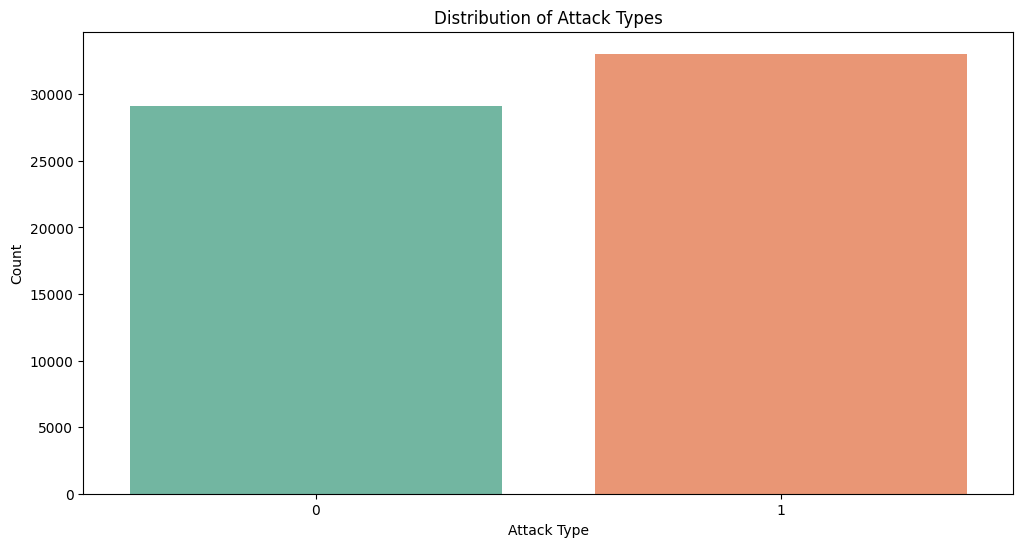

In [ ]:
# Distribution of Attack Types
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='binary_attack', palette='Set2')
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.show()


<ipython-input-26-403ad2674da9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='protocol_type', palette='muted')


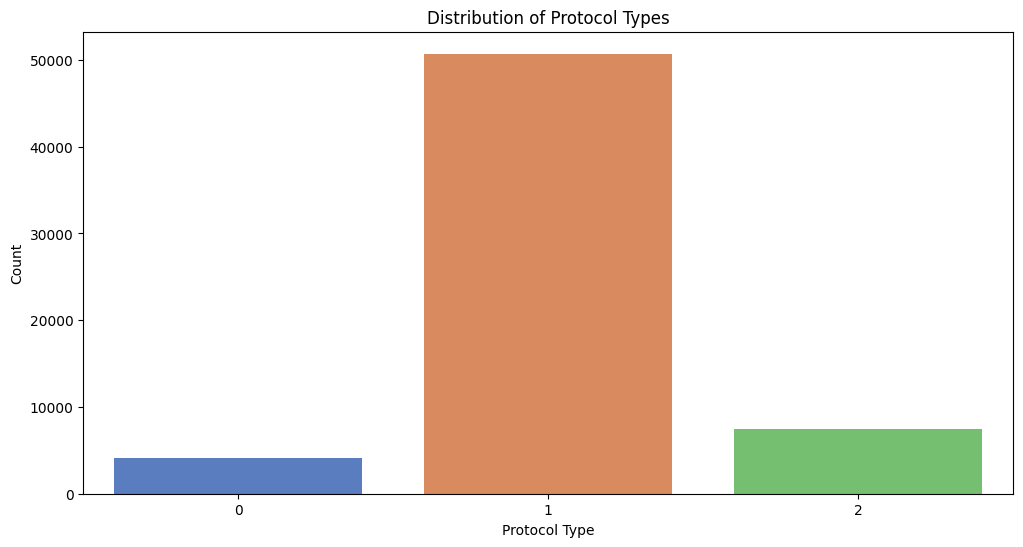

In [ ]:
# Plot protocol types distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='protocol_type', palette='muted')
plt.title('Distribution of Protocol Types')
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.show()


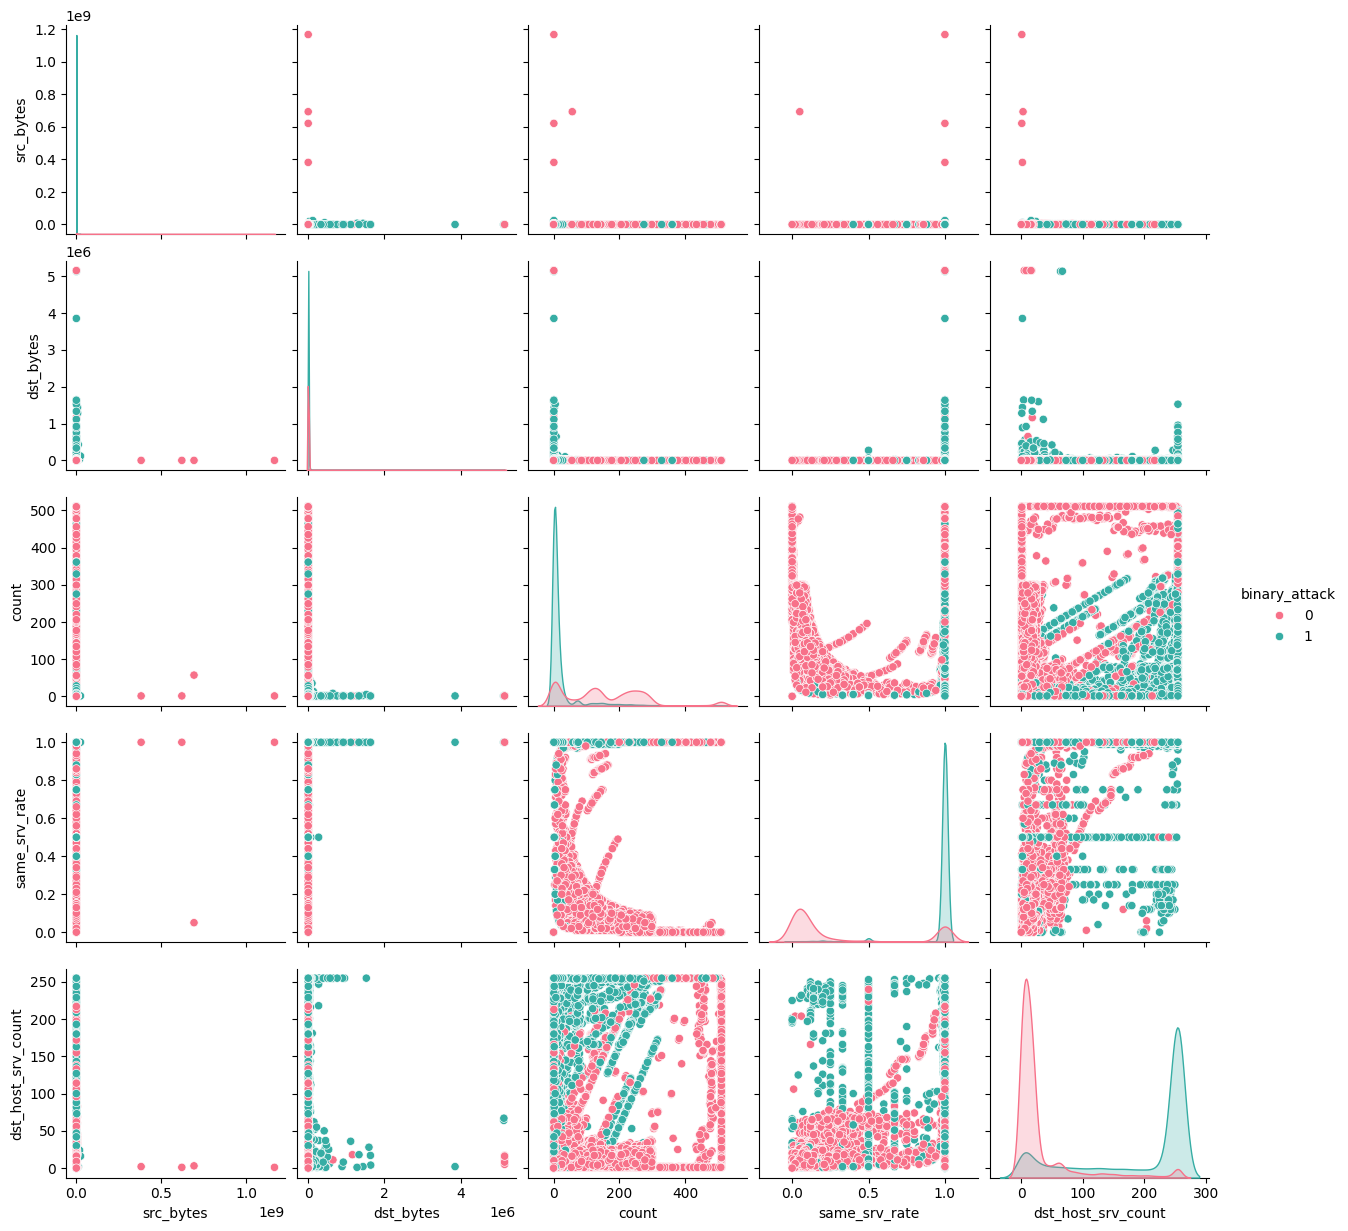

In [ ]:
# Pairplot to visualize relationships between numerical features
selected_features = ['src_bytes', 'dst_bytes', 'count', 'same_srv_rate', 'dst_host_srv_count']
sns.pairplot(train_df[selected_features + ['binary_attack']], hue='binary_attack', palette='husl')
plt.show()


Encoding


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

combined_df = pd.concat([train_df, test_df], axis=0)

le = LabelEncoder()
for column in ['protocol_type', 'service', 'flag', 'binary_attack']:
    combined_df[column] = le.fit_transform(combined_df[column])


Splitting training data and testing data

In [ ]:
# Split back into train and test sets
train_df = combined_df.iloc[:len(train_df), :]
test_df = combined_df.iloc[len(train_df):, :]

# Splitting features and target variable
x_train = train_df.drop('binary_attack', axis=1)
y_train = train_df['binary_attack']
x_test = test_df.drop('binary_attack', axis=1)
y_test = test_df['binary_attack']

Graphs

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

,0
src_bytes,0.567076
service,0.468069
dst_bytes,0.440768
flag,0.363761
diff_srv_rate,0.359801
same_srv_rate,0.359243
dst_host_srv_count,0.332787
dst_host_same_srv_rate,0.308568
dst_host_diff_srv_rate,0.285758
logged_in,0.283112


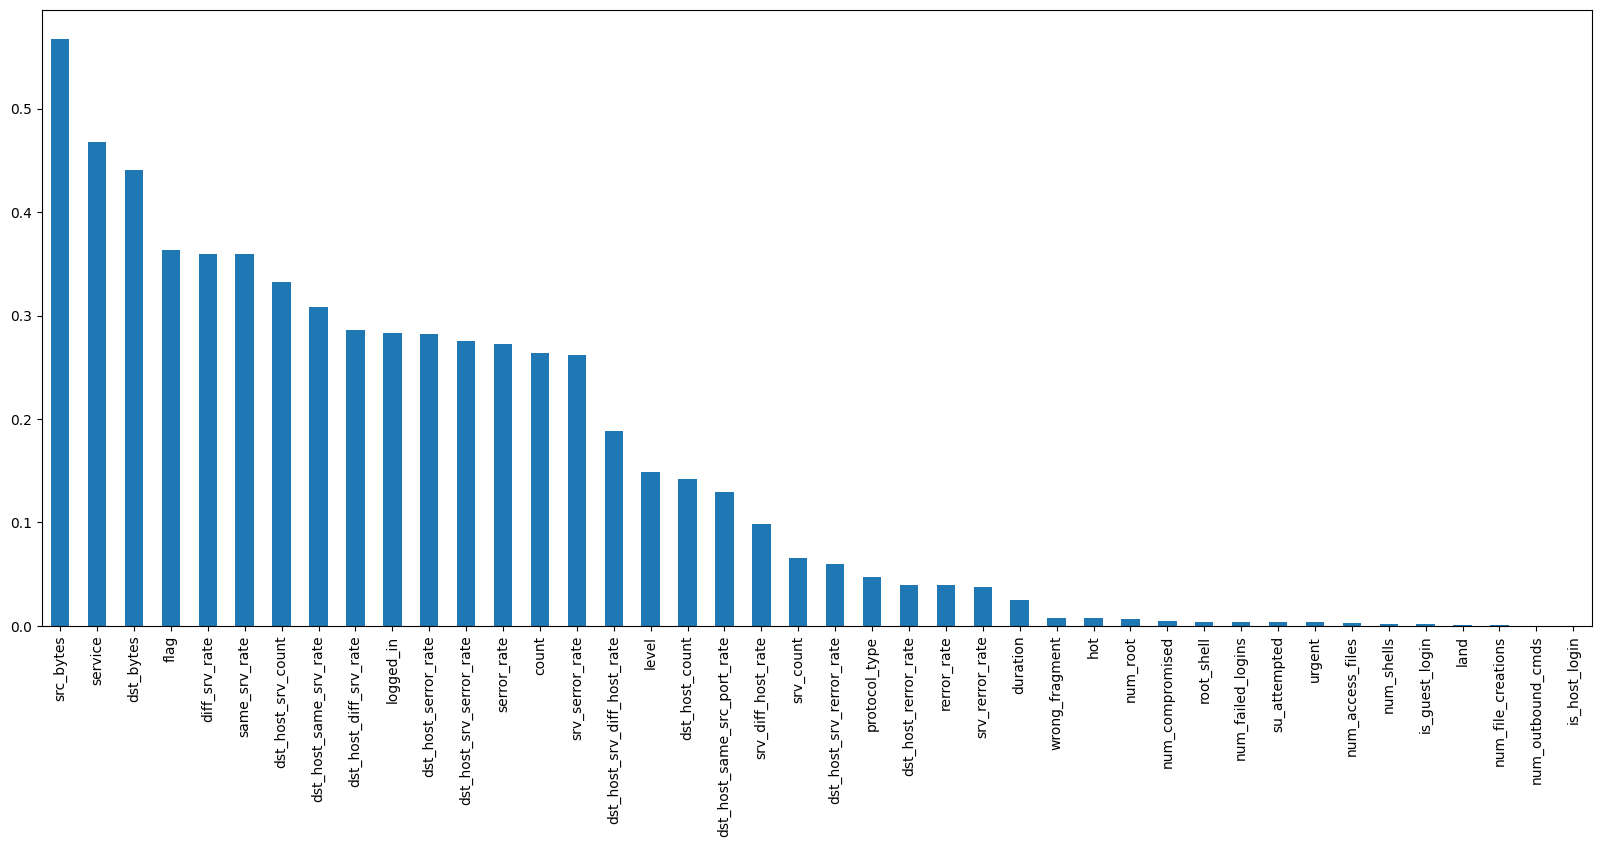

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8));

In [ ]:
col=['service', 'flag', 'src_bytes', 'dst_bytes', 'logged_in',
       'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate']
x_train=x_train[col]
x_test=x_test[col]

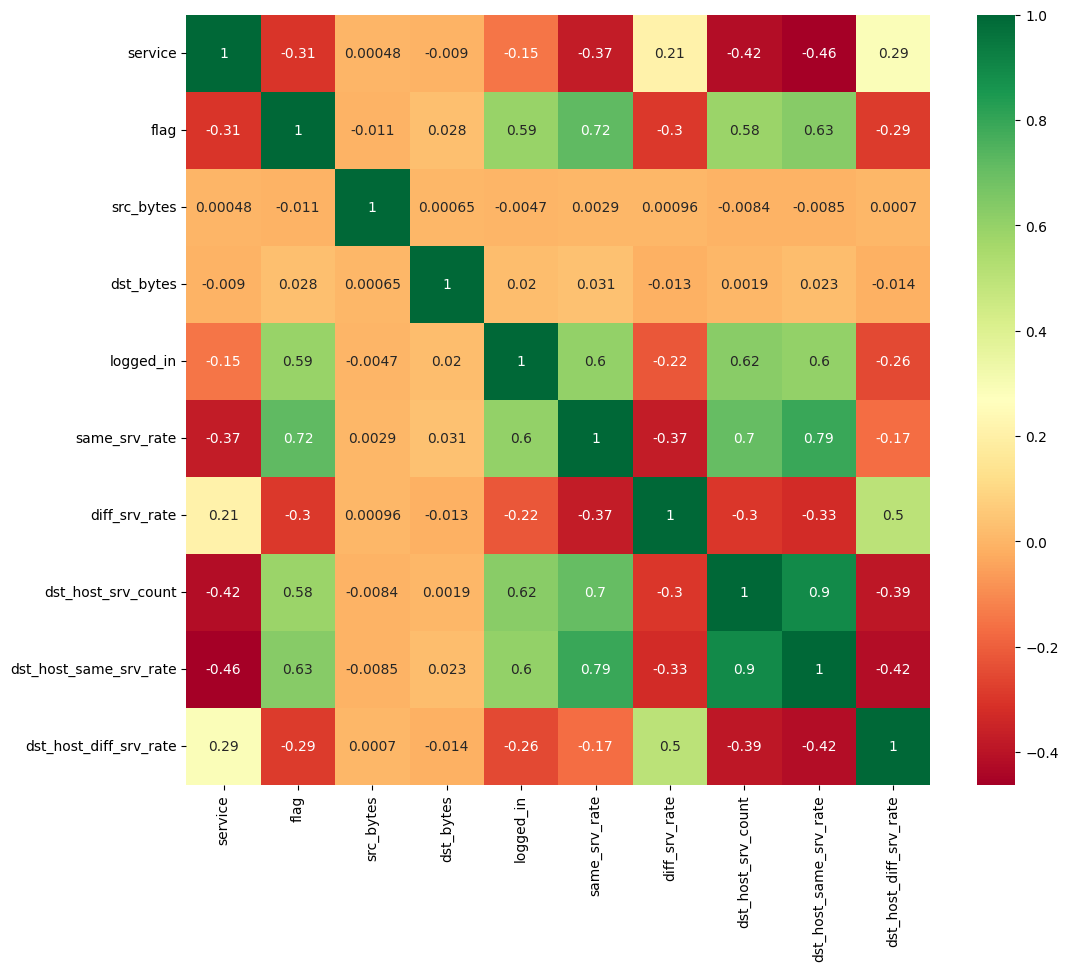

In [ ]:
plt.figure(figsize=(12,10))
p=sns.heatmap(x_train.corr(), annot=True,cmap ='RdYlGn')

Scaling


In [ ]:
# Scaling the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**Testing and Evaluation:** Binary classification model


In [ ]:
# we'll initialize each model and store it by name in a dictionary
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines linear'] = LinearSVC()
models['Support Vector Machines plonomial'] = SVC(kernel='poly')
models['Support Vector Machines RBf'] =  SVC(C=100.0)

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier(max_depth=3)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier(n_neighbors=20)

                                    Accuracy  Precision    Recall
Logistic Regression                 0.718062   0.809490  0.718062
Support Vector Machines linear      0.724805   0.820728  0.724805
Support Vector Machines polynomial  0.767078   0.835162  0.767078
Support Vector Machines RBF         0.809617   0.851766  0.809617
Decision Trees                      0.777990   0.836621  0.777990
Random Forest                       0.777502   0.842784  0.777502
Naive Bayes                         0.726845   0.831605  0.726845
K-Nearest Neighbor                  0.793825   0.844492  0.793825


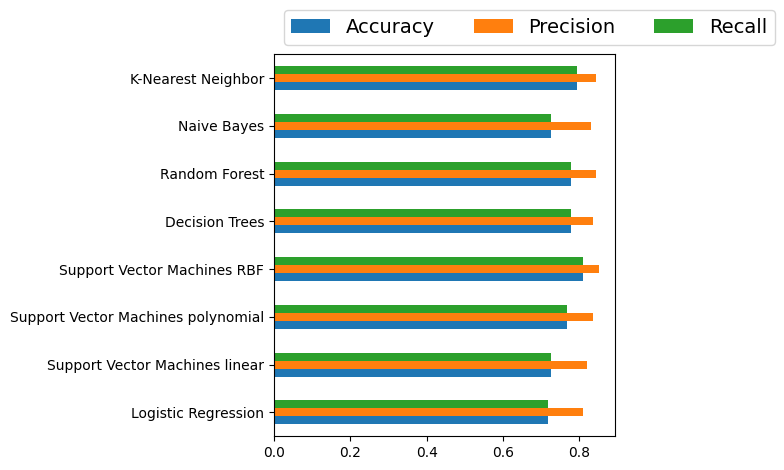

In [ ]:
# Initialize each model and store it by name in a dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machines linear': LinearSVC(),
    'Support Vector Machines polynomial': SVC(kernel='poly'),
    'Support Vector Machines RBF': SVC(C=100.0),
    'Decision Trees': DecisionTreeClassifier(max_depth=3),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbor': KNeighborsClassifier(n_neighbors=20)
}

# Train and evaluate each model
accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    # Fit the classifier
    models[key].fit(x_train, y_train)

    # Make predictions
    predictions = models[key].predict(x_test)

    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test, average='weighted')
    recall[key] = recall_score(predictions, y_test, average='weighted')

# Display results
import pandas as pd

results_df = pd.DataFrame({
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall
})

print(results_df)

# Create a DataFrame for the metrics
df_metrics = pd.DataFrame({
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall
})

# Plot the bar chart for model metrics
ax = df_metrics.plot.barh()
ax.legend(ncol=len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.datasets import make_classification

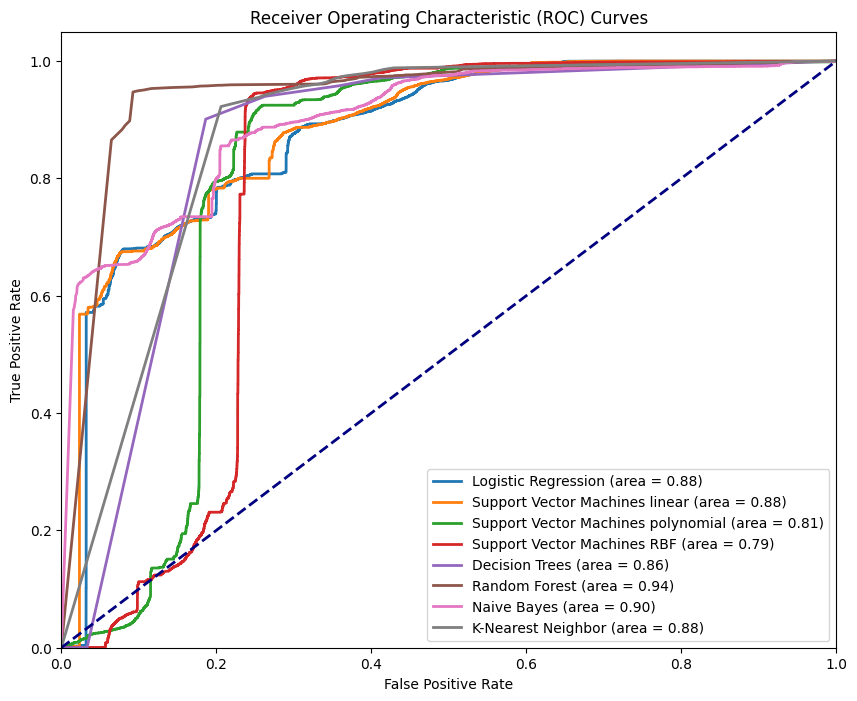

In [ ]:
# Train and evaluate each model (replace with your actual training and evaluation steps)
for name, model in models.items():
    model.fit(x_train, y_train)

# Plot ROC curve
plt.figure(figsize=(10, 8))
for name, model in models.items():
    if hasattr(model, "predict_proba"):  # Check if the model has predict_proba method
        prob_pos = model.predict_proba(x_test)[:, 1]
    else:  # Use decision function for SVC models
        prob_pos = model.decision_function(x_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fpr, tpr, _ = roc_curve(y_test, prob_pos)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

**Conclusion:** Thus according to the data, Support Vector Machines RBF is the best classifier achieving the highest accuracy, precision, and recall.


<u> **EDA** </u>

**Importing Libraries:**numpy, pandas, matplotlib,pyplot, seaborn, sklearn
(various modules), scipy <br><br>

**Data Preprocessing:**Info of the dataset, checking for null values and converting apt columns to numeric types <br><br>

**Model Training:**Checking for Outliers ,converting 'attack' to binary classification,Label Encoding, Splitting data back into training and testing datasets ,graphs and scaling. <br><br>

**Model Testing:** using Binary Classification Models. Training and evaluating multiple models (Logistic Regression, SVM, Decision Trees, Random Forest, Naive Bayes, K-Nearest Neighbor).<br><br>


**Evaluation based on Compare Metrics:**

Accuracy: Indicates the overall correctness of the model.<br>
Precision: Measures the accuracy of the positive predictions.<br>
Recall: Measures the ability of the model to capture all positive instances.<br>
ROC Curve: Evaluating model performance through ROC curves and calculating the Area Under the Curve (AUC).